In [ ]:
import torch

tensor=torch.tensor([1,2,3])
#tensor+10,tensor*10,torch.mul(tensor,10),torch.multiply(tensor,10)
tensor@tensor,torch.matmul(tensor,tensor)


In [13]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [20]:
import torch
T1 = torch.tensor([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
# 假设是时间步T2
T2 = torch.tensor([[10, 20, 30],
                 [40, 50, 60],
                 [70, 80, 90]])
y=torch.stack((T1,T2),dim=1)
y
x=torch.permute(T1,(1,0))
x,T1.T

(tensor([[1, 4, 7],
         [2, 5, 8],
         [3, 6, 9]]),
 tensor([[1, 4, 7],
         [2, 5, 8],
         [3, 6, 9]]))

In [42]:
def outer(some_func):
    def inner():
        print("before some_func")
        ret = some_func()
        return ret + 1
    return inner

def foo():
    return 1

foo = outer(foo)
foo()

before some_func


2

(torch.Size([3, 256, 256]), None)

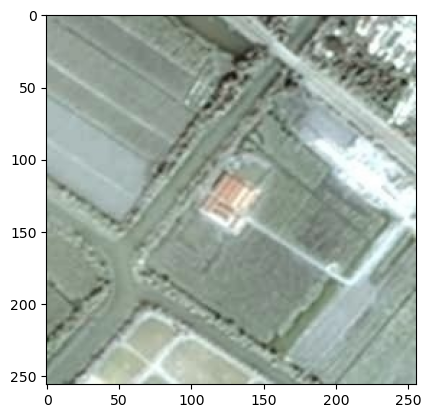

In [3]:
import time

import torch
from dataTreat.readData import LzgdDataset,img_transforms
import numpy as np
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import os,cv2
import numpy as np
import visualization.visualizationTool as visTool


train_img_dir='data/trainImg'
train_label_dir='data/trainLabel1'

trainDataset = LzgdDataset(train_img_dir,train_label_dir,img_transforms)
trainDataloader = DataLoader(trainDataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=True)
type(trainDataset),len(trainDataset)

valid_img_dir='data/validImg'
valid_label_dir='data/validLabel1'

validDataset = LzgdDataset(valid_img_dir,valid_label_dir,img_transforms)
validDataloader = DataLoader(validDataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=True)

# for step,(img,label) in enumerate(validDataloader):
#     print(label.shape)
#     print(os.path.basename(validDataloader.dataset.data_list[step]))
img,label=trainDataloader.dataset[2]
img.shape,visTool.showImage(img)

In [1]:
import os
import cv2
import numpy as np
import torch
import tool.tool as tool
path='../data/trainLabel1Part'
img_list=[]
# for s in os.listdir(path):
#     img=cv2.imread(os.path.join(path,s))
#     # print(isinstance(img,np.ndarray))
#     img_list.append(img)
# tool.getValueCount(img_list[-3])

In [2]:
from collections import Counter
pixel_list=[]
img_list=[]
for s in os.listdir(path):
    img=cv2.imread(os.path.join(path,s),cv2.IMREAD_GRAYSCALE)
    print(img.shape)
    img_list.append(img)
    # height=len(img)
    # width=len(img[0])
    # channel=len(img[0][0])
    # print(height,width,channel)
    # for x in range(0,height):
    #     for y in range(0,width):
    #         for z in range(0,channel):
    #             img_list.append(img)
    #             if img[x,y,z]<128:
    #                 img[x,y,z]=0
    #             else:
    #                 img[x,y,z]=255
    #             pixel_list.append(img[x,y,z])


    cv2.imwrite(os.path.join(path,s.split('.')[0]+'.png'),img)
    # os.remove(os.path.join(path,s))
# Counter(pixel_list)
# tool.getValueCount(img_list[-1]),len(pixel_list)





(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
